In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# exibir imagens em grid
from matplotlib import pyplot as plt

def showImages(imgsArray, titlesArray, size, grid=(1,1)):
    y, x = grid
    fig, axes = plt.subplots(y, x, figsize=size)
    axes = axes.ravel() if isinstance(axes, np.ndarray) else np.array([axes])

    if len(imgsArray) != len(titlesArray):
        print("ERRO: O número de imagens e títulos deve ser o mesmo!")
        return

    for idx, (img, title) in enumerate(zip(imgsArray, titlesArray)):
        if len(img.shape) == 2:  # A imagem é tons de cinza
            axes[idx].imshow(img, cmap='gray')
        else:  # A imagem é RGB
            axes[idx].imshow(img)
        axes[idx].set_title(title, fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad=10)
        if len(title) == 0:
            axes[idx].axis('off')

    plt.tight_layout()  # ajusta automaticamente o layout para evitar sobreposição
    plt.show()
    
#Para exibir uma única imagem:
#showImages([img1], ["Título 1"], size=(10,10), grid=(1,1))

#Para exibir duas imagens lado a lado:
#showImages([img1, img2], ["Título 1", "Título 2"], size=(10,10), grid=(1,2))

#Para exibir quatro imagens em uma grade 2x2:
#showImages([img1, img2, img3, img4], ["Título 1", "Título 2", "Título 3", "Título 4"], size=(10,10), grid=(2,2))

# Encontrando contornos de uma imagem binária

In [10]:
img = cv2.imread('contours_ex1.png')
assert img is not None, "file could not be read, check with os.path.exists()" # Verifica se a imagem foi carregada corretamente
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converte a imagem de BGR para escala de cinza
ret, thresh = cv2.threshold(img_gray, 127, 255, 0) # Aplica um threshold para binarizar a imagem

'''
cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE): Encontra contornos na imagem binária.
- thresh: A imagem binária na qual os contornos serão encontrados.
- cv2.RETR_TREE: Modo de recuperação de contornos que retorna todos os contornos e 
organiza-os em uma hierarquia.
- cv2.CHAIN_APPROX_SIMPLE: Método de aproximação de contornos que remove todos os pontos redundantes 
e comprime o contorno, economizando memória.
- contours: Uma lista de todos os contornos encontrados na imagem. Cada contorno é representado 
como um array de pontos (coordenadas x, y) que formam a borda do objeto detectado.
- hierarchy: Uma matriz que descreve a hierarquia dos contornos, fornecendo informações sobre a 
relação entre eles (por exemplo, contornos pais e filhos).
'''
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(contours, hierarchy) # Apenas 1 contorno. Não há relações hierárquicas (próximo, 
# anterior, filho, pai) entre contornos, porque há apenas um contorno. Os valores -1 indicam a 
# ausência de outros contornos.

(array([[[ 54,  53]],

       [[ 54, 195]],

       [[414, 195]],

       [[414,  53]]], dtype=int32),) [[[-1 -1 -1 -1]]]


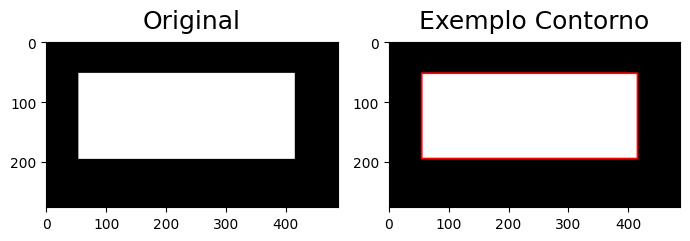

In [12]:
'''
A função cv.drawContours é usada para desenhar os contornos encontrados em uma imagem.
O primeiro argumento, img, é a imagem onde você quer que os contornos apareçam.
O segundo argumento, contours, é a lista de todos os contornos que você encontrou anteriormente com 
cv.findContours.
O terceiro argumento, -1, significa que você deseja desenhar todos os contornos na lista. Se quisesse 
desenhar apenas um contorno específico, você colocaria o índice desse contorno.
O quarto argumento, (0, 255, 0), define a cor verde para os contornos. As cores no OpenCV são 
especificadas em formato BGR.
O quinto argumento, 3, define a espessura da linha dos contornos em 3 pixels. Isso significa que as 
linhas dos contornos terão uma largura de 3 pixels.
'''
cv2.drawContours(img, contours, -1, (255, 0, 0), 2)

showImages([img_gray, img], ["Original", "Exemplo Contorno"], size=(7,7), grid=(1,2))

# Os parâmetros de cv2.findContours

contours, hierarchy = cv2.findContours(image, mode, method)

- image: A imagem binária onde os contornos serão detectados.
- mode: Define o modo de recuperação dos contornos.
- method: Define o método de aproximação dos contornos.
  
### Parâmetro mode
O parâmetro mode especifica como os contornos serão recuperados. Ele define a hierarquia dos contornos e pode assumir os seguintes valores:

1. **cv2.RETR_EXTERNAL**
   - Recupera apenas os contornos mais externos.
   - Não considera a hierarquia dos contornos internos.
   - Útil quando você só precisa dos contornos externos de um objeto.

2. **cv2.RETR_LIST**
   - Recupera todos os contornos sem nenhuma relação hierárquica.
   - Todos os contornos são armazenados no mesmo nível.
   - Útil para obter uma lista de todos os contornos sem se preocupar com a hierarquia.

3. **cv2.RETR_CCOMP**
   - Recupera todos os contornos e os organiza em uma hierarquia de dois níveis.
   - No nível superior, estão os contornos externos dos componentes.
   - No segundo nível, estão os contornos dos buracos dentro desses componentes.
   - Útil para análise de contornos com buracos.

4. **cv2.RETR_TREE**
   - Recupera todos os contornos e reconstrói uma hierarquia completa de contornos aninhados.
   - Mantém a relação pai-filho entre os contornos.
   - Útil para análise detalhada de contornos aninhados.

Total de contornos: 3


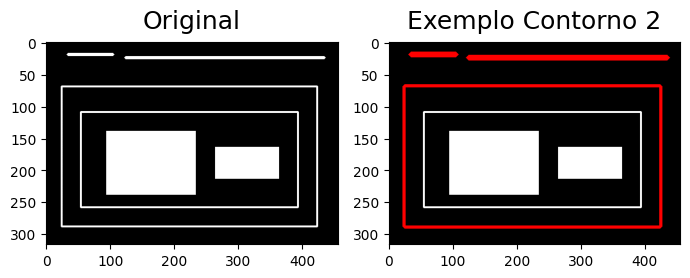

In [15]:
#cv2.RETR_EXTERNAL
img = cv2.imread('contours_ex2.png')
assert img is not None, "file could not be read, check with os.path.exists()" # Verifica se a imagem foi carregada corretamente
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converte a imagem de BGR para escala de cinza
ret, thresh = cv2.threshold(img_gray, 127, 255, 0) # Aplica um threshold para binarizar a imagem

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Total de contornos: {len(contours)}")  

cv2.drawContours(img, contours, -1, (255, 0, 0), 3)

showImages([img_gray, img], ["Original", "Exemplo Contorno 2"], size=(7,7), grid=(1,2))

Total de contornos: 8


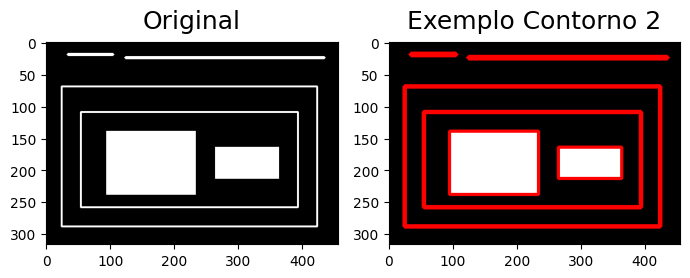

In [36]:
#cv2.RETR_TREE
img = cv2.imread('contours_ex2.png')
assert img is not None, "file could not be read, check with os.path.exists()" # Verifica se a imagem foi carregada corretamente
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converte a imagem de BGR para escala de cinza
ret, thresh = cv2.threshold(img_gray, 127, 255, 0) # Aplica um threshold para binarizar a imagem

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(f"Total de contornos: {len(contours)}") 

cv2.drawContours(img, contours, -1, (255, 0, 0), 3)

showImages([img_gray, img], ["Original", "Exemplo Contorno 2"], size=(7,7), grid=(1,2))

Total de contornos: 8


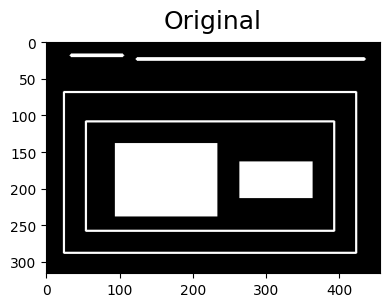

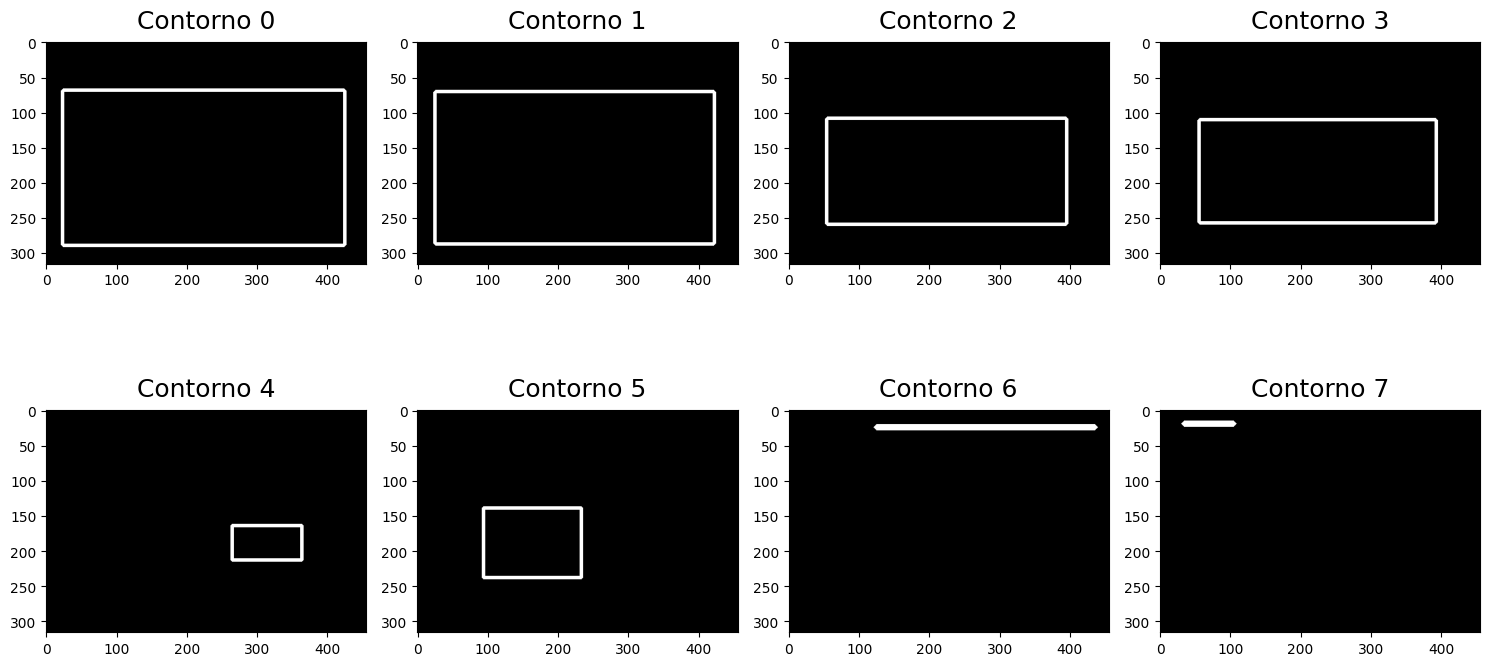

In [42]:
# Carregar a imagem e processar
img = cv2.imread('contours_ex2.png')
assert img is not None, "file could not be read, check with os.path.exists()"  # Verifica se a imagem foi carregada corretamente
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Converte a imagem de BGR para escala de cinza
ret, thresh = cv2.threshold(img_gray, 127, 255, 0)  # Aplica um threshold para binarizar a imagem

# Encontrar contornos
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(f"Total de contornos: {len(contours)}")  

# Criar uma lista de imagens com cada contorno desenhado separadamente
contour_images = []
titles = []

for i, contour in enumerate(contours):
    img_contour = np.zeros_like(img)  # Cria uma imagem preta do mesmo tamanho da original
    cv2.drawContours(img_contour, contours, i, (255, 255, 255), 3)  # Desenha o contorno atual em branco
    contour_images.append(img_contour)
    titles.append(f"Contorno {i}")

# Exibir todas as imagens de contornos separadamente
num_images = len(contours)
grid_size = (2, 4)  # Definindo o grid para 4 colunas e 2 linhas
showImages([img], ["Original"], size=(4, 4), grid=(1,1))
showImages(contour_images, titles, size=(15, num_images), grid=grid_size)

In [43]:
print(hierarchy)

[[[ 6 -1  1 -1]
  [-1 -1  2  0]
  [-1 -1  3  1]
  [-1 -1  4  2]
  [ 5 -1 -1  3]
  [-1  4 -1  3]
  [ 7  0 -1 -1]
  [-1  6 -1 -1]]]


Total de contornos: 8
Hierarchy: [[[ 6 -1  1 -1]
  [-1 -1  2  0]
  [-1 -1  3  1]
  [-1 -1  4  2]
  [ 5 -1 -1  3]
  [-1  4 -1  3]
  [ 7  0 -1 -1]
  [-1  6 -1 -1]]]


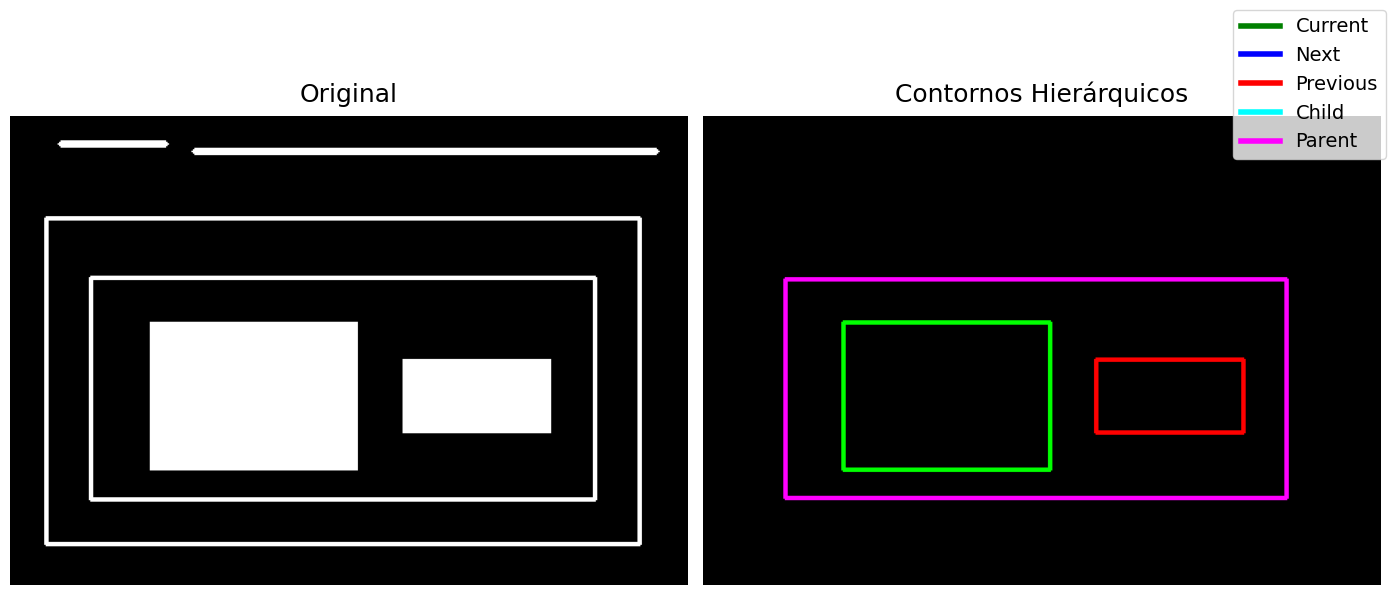

In [21]:
# Função para desenhar contornos de acordo com a hierarquia
def drawHierarchyContours(image, contours, hierarchy, index):
    img_hierarchy = np.zeros_like(image)
    colors = {
        'current': (0, 255, 0),  # Verde
        'next': (255, 0, 0),     # Azul
        'previous': (0, 0, 255), # Vermelho
        'child': (255, 255, 0),  # Ciano
        'parent': (255, 0, 255)  # Magenta
    }
    
    def draw_contour(idx, color):
        if idx != -1:
            cv2.drawContours(img_hierarchy, contours, idx, color, 2)
    
    draw_contour(index, colors['current'])  # Desenha o contorno atual
    draw_contour(hierarchy[0][index][0], colors['next'])  # Desenha o próximo contorno
    draw_contour(hierarchy[0][index][1], colors['previous'])  # Desenha o contorno anterior
    draw_contour(hierarchy[0][index][2], colors['child'])  # Desenha o contorno filho
    draw_contour(hierarchy[0][index][3], colors['parent'])  # Desenha o contorno pai

    return img_hierarchy, colors

# Carregar a imagem e processar
img = cv2.imread('contours_ex2.png')
assert img is not None, "file could not be read, check with os.path.exists()"  # Verifica se a imagem foi carregada corretamente
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Converte a imagem de BGR para escala de cinza
ret, thresh = cv2.threshold(img_gray, 127, 255, 0)  # Aplica um threshold para binarizar a imagem

# Encontrar contornos
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(f"Total de contornos: {len(contours)}")  
print("Hierarchy:", hierarchy)

# Desenhar os contornos de acordo com a hierarquia
index_to_draw = 5  # Mude esse índice para desenhar outros contornos
img_hierarchy, colors = drawHierarchyContours(img, contours, hierarchy, index_to_draw)

# Criar a legenda
legend_patches = [
    plt.Line2D([0], [0], color='green', lw=4, label='Current'),
    plt.Line2D([0], [0], color='blue', lw=4, label='Next'),
    plt.Line2D([0], [0], color='red', lw=4, label='Previous'),
    plt.Line2D([0], [0], color='cyan', lw=4, label='Child'),
    plt.Line2D([0], [0], color='magenta', lw=4, label='Parent')
]

# Exibir a imagem original e a imagem com contornos hierárquicos com legenda
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original', fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad=10)
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(img_hierarchy, cv2.COLOR_BGR2RGB))
ax[1].set_title('Contornos Hierárquicos', fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad=10)
ax[1].axis('off')

# Adicionar a legenda
fig.legend(handles=legend_patches, loc='upper right', fontsize=14)
plt.tight_layout()
plt.show()

### Parâmetro method

O parâmetro method especifica o método de aproximação dos contornos, que pode ser:

1. cv2.CHAIN_APPROX_NONE:

- Armazena todos os pontos do contorno.
- Pode resultar em muitos pontos, especialmente para contornos grandes ou detalhados.
- Útil quando você precisa de todos os pontos exatos do contorno.

2. cv2.CHAIN_APPROX_SIMPLE:

- Remove todos os pontos redundantes, como segmentos horizontais, verticais e diagonais, e armazena apenas os pontos finais desses segmentos.
- Reduz significativamente o número de pontos armazenados.
- Útil para simplificação do contorno, mantendo a forma geral.

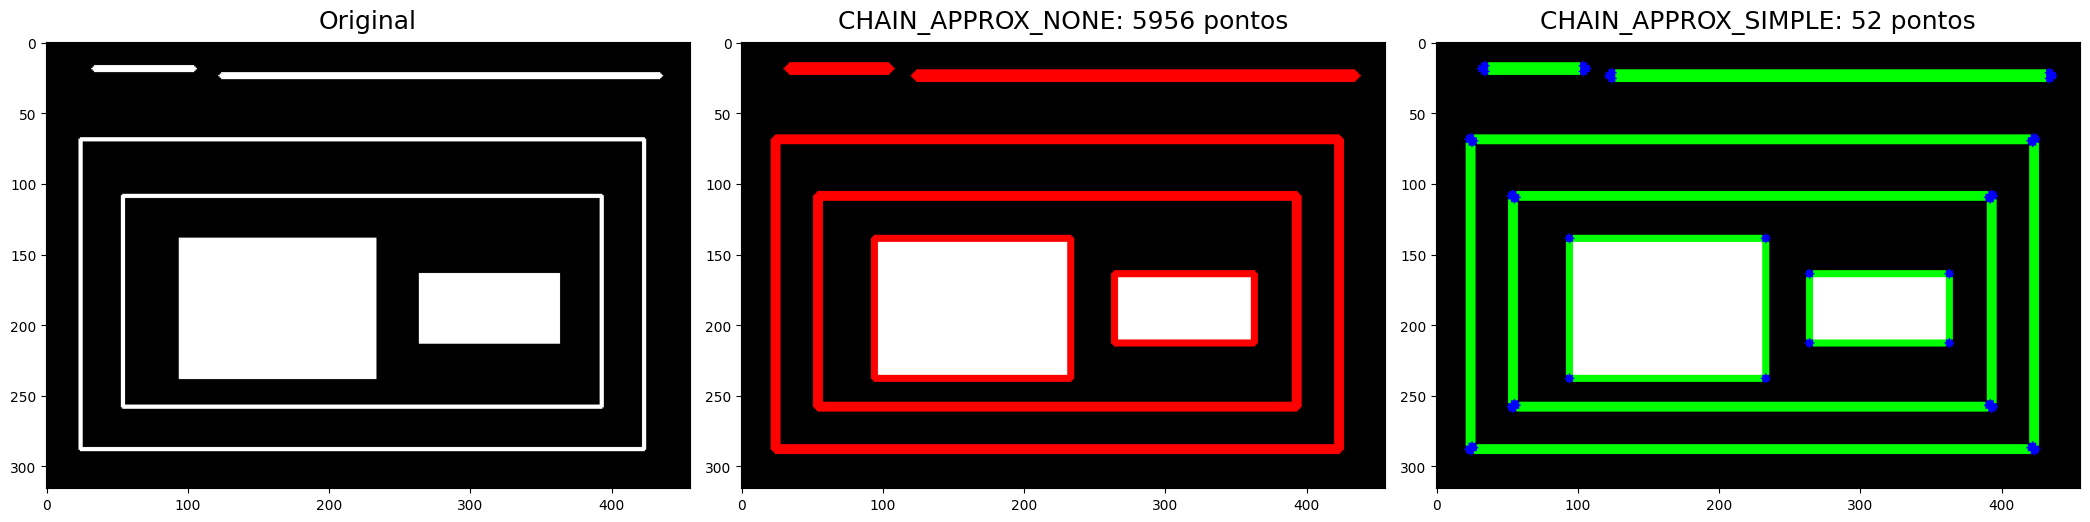

In [65]:
# Carregar a imagem e processar
img = cv2.imread('contours_ex2.png')
assert img is not None, "file could not be read, check with os.path.exists()"  # Verifica se a imagem foi carregada corretamente
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Converte a imagem de BGR para escala de cinza
ret, thresh = cv2.threshold(img_gray, 127, 255, 0)  # Aplica um threshold para binarizar a imagem

# Encontrar contornos usando cv2.CHAIN_APPROX_NONE
contours_none, hierarchy_none = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
img_contours_none = img.copy()
cv2.drawContours(img_contours_none, contours_none, -1, (255, 0, 0), 3)

# Encontrar contornos usando cv2.CHAIN_APPROX_SIMPLE
contours_simple, hierarchy_simple = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours_simple = img.copy()
cv2.drawContours(img_contours_simple, contours_simple, -1, (0, 255, 0), 3)

# Desenhar apenas os pontos para cv2.CHAIN_APPROX_SIMPLE
for contour in contours_simple:
    for point in contour:
        cv2.circle(img_contours_simple, tuple(point[0]), 3, (0, 0, 255), -1)

# Contar pontos armazenados para cada método
points_none = sum(len(c) for c in contours_none)
points_simple = sum(len(c) for c in contours_simple)

# Títulos com informações sobre os pontos armazenados
titles = [
    "Original",
    f"CHAIN_APPROX_NONE: {points_none} pontos",
    f"CHAIN_APPROX_SIMPLE: {points_simple} pontos"
]

# Exibir as imagens em um grid 1x3
showImages([img_gray, img_contours_none, img_contours_simple], titles, size=(21, 7), grid=(1, 3))

- https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html
- https://docs.opencv.org/4.x/dd/d49/tutorial_py_contour_features.html
- https://docs.opencv.org/4.x/d1/d32/tutorial_py_contour_properties.html
- https://docs.opencv.org/4.x/d5/d45/tutorial_py_contours_more_functions.html
- https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html